# TP2
Nom et Matricule des étudiants : \\
Mohamad Hawchar, HAWM20039905 \\
 \\


In [ ]:
pip install scikit-plot

In [ ]:
!unzip '/content/drive/MyDrive/tp2/donnees2.zip'

Streaming output truncated to the last 5000 lines.
  inflating: donnees/test/girafe/0005.png  
  inflating: donnees/test/girafe/0006.png  
  inflating: donnees/test/girafe/0007.png  
  inflating: donnees/test/girafe/0008.png  
  inflating: donnees/test/girafe/0009.png  
  inflating: donnees/test/girafe/0010.png  
  inflating: donnees/test/girafe/0011.png  
  inflating: donnees/test/girafe/0012.png  
  inflating: donnees/test/girafe/0013.png  
  inflating: donnees/test/girafe/0014.png  
  inflating: donnees/test/girafe/0015.png  
  inflating: donnees/test/girafe/0016.png  
  inflating: donnees/test/girafe/0017.png  
  inflating: donnees/test/girafe/0018.png  
  inflating: donnees/test/girafe/0019.png  
  inflating: donnees/test/girafe/0020.png  
  inflating: donnees/test/girafe/0021.png  
  inflating: donnees/test/girafe/0022.png  
  inflating: donnees/test/girafe/0023.png  
  inflating: donnees/test/girafe/0024.png  
  inflating: donnees/test/girafe/0025.png  
  inflating: donnees/test

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 120, 120, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 120, 120, 128)     3584      
                                                                 
 activation (Activation)     (None, 120, 120, 128)     0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 60, 60, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 60, 60, 128)       0         
                                                                 
 batch_normalization (BatchN  (None, 60, 60, 128)      512       
 ormalization)                                               

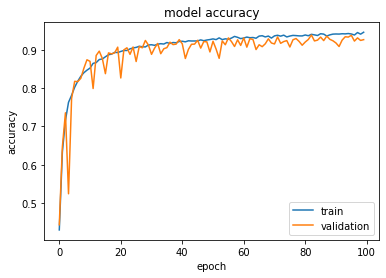

Total time:  36.440249601999916  minutes


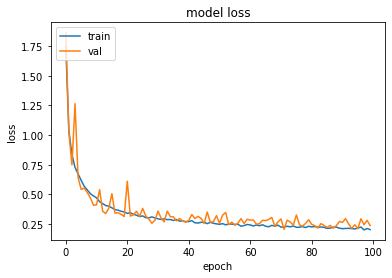

In [ ]:


# ===========================================================================
# TP2 : INF7370 - Hiver 2022
#
# Indiquer votre nom ici
#
#===========================================================================

# #===========================================================================
# Ce mod�le est un classifieur (un CNN) entrain� sur l'ensemble de donn�es MNIST afin de distinguer entre les images des chiffres 2 et 7.
# MNIST est une base de donn�es contenant des chiffres entre 0 et 9 �crits � la main en noire et blanc de taille 28x28 pixels
# Pour des fins d'illustration, nous avons pris seulement deux chiffres 2 et 7
#
# Donn�es:
# ------------------------------------------------
# entrainement : classe '2': 4 000 images | classe '7': images 4 000 images
# validation   : classe '2': 1 000 images | classe '7': images 1 000 images
# test         : classe '2': 1 000 images | classe '7': images 1 000 images 
# ------------------------------------------------

#>>> Ce code fonctionne sur MNIST. 
#>>> Vous devez donc intervenir sur ce code afin de l'adapter aux donn�es du TP. 
#>>> � cette fin rep�rer les section QUESTION et ins�rer votre code et modification � ces endroits

# ==========================================
# ======CHARGEMENT DES LIBRAIRIES===========
# ==========================================

# La libraire responsable du chargement des donn�es dans la m�moire

from keras.preprocessing.image import ImageDataGenerator

# Le Type de notre mod�le (s�quentiel)

from keras.models import Model
from keras.models import Sequential

# Le type d'optimisateur utilis� dans notre mod�le (RMSprop, adam, sgd, adaboost ...)
# L'optimisateur ajuste les poids de notre mod�le par descente du gradient
# Chaque optimisateur a ses propres param�tres
# Note: Il faut tester plusieurs et ajuster les param�tres afin d'avoir les meilleurs r�sultats

from tensorflow.keras.optimizers import Adam
#from keras.optimizers import Adam

# Les types des couches utlilis�es dans notre mod�le
from keras.layers import Conv2D, MaxPooling2D, Input, BatchNormalization, UpSampling2D, Activation, Dropout, Flatten, Dense , LeakyReLU

# Des outils pour suivre et g�rer l'entrainement de notre mod�le
from keras.callbacks import CSVLogger, ModelCheckpoint, EarlyStopping

# Configuration du GPU
import tensorflow as tf
from keras import backend as K

# Affichage des graphes 
import matplotlib.pyplot as plt
import time
from datetime import timedelta
from keras.regularizers import l2
from keras.regularizers import l1
# ==========================================
# ===============GPU SETUP==================
# ==========================================

# Configuration des GPUs et CPUs
config = tf.compat.v1.ConfigProto(device_count={'GPU': 2, 'CPU': 4})
sess = tf.compat.v1.Session(config=config)
tf.compat.v1.keras.backend.set_session(sess)

# ==========================================
# ================VARIABLES=================
# ==========================================

# ******************************************************
#                       QUESTION DU TP
# ******************************************************
# 1) Ajuster les variables suivantes selon votre probl�me:
# - mainDataPath
# - training_batch_size
# - validation_batch_size
# - image_scale
# - image_channels
# - images_color_mode
# - fit_batch_size
# - fit_epochs
# ******************************************************

# Le dossier principal qui contient les donn�es
mainDataPath = "donnees/"

# Le dossier contenant les images d'entrainement
trainPath = mainDataPath + "entrainement"

# Le dossier contenant les images de validation
validationPath = mainDataPath + "validation"

# Le dossier contenant les images de test
testPath = mainDataPath + "test"

# Le nom du fichier du mod�le � sauvegarder
modelsPath = "Model.hdf5"


# Le nombre d'images d'entrainement et de validation
# Il faut en premier lieu identifier les param�tres du CNN qui permettent d'arriver � des bons r�sultats. � cette fin, la d�marche g�n�rale consiste � utiliser une partie des donn�es d'entrainement et valider les r�sultats avec les donn�es de validation. Les param�tres du r�seaux (nombre de couches de convolutions, de pooling, nombre de filtres, etc) devrait etre ajust�s en cons�quence.  Ce processus devrait se r�p�ter jusqu'a l'obtention d'une configuration (architecture) satisfaisante. 
# Si on utilise l'ensemble de donn�es d'entrainement en entier, le processus va �tre long car on devrait ajuster les param�tres et reprendre le processus sur tout l'ensemble des donn�es d'entrainement.


training_batch_size = 21600  # 90% pour l'entrainement
validation_batch_size = 2400  # 10% pour la validation

# Configuration des  images 
image_scale = 120 # la taille des images
image_channels = 3  # le nombre de canaux de couleurs 3 pour RGB
images_color_mode = "rgb"  #  rgb pour les images en couleurs 
image_shape = (image_scale, image_scale, image_channels) # la forme des images d'entr�es, ce qui correspond � la couche d'entr�e du r�seau

# Configuration des param�tres d'entrainement
fit_batch_size = 32 # le nombre d'images entrain�es ensemble: un batch
fit_epochs = 100 # Le nombre d'�poques 

input_layer = Input(shape=image_shape)

def feature_extraction(input):
  
    #1
    x = Conv2D(128, (3, 3), padding='same')(input) 
    x = Activation("relu")(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Dropout(0.2)(x)
    x = BatchNormalization()(x)
    #2
    x = Conv2D(128, (3, 3), padding='same')(x) 
    x = Activation("relu")(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Dropout(0.2)(x)
    x = BatchNormalization()(x)
    #3
    x = Conv2D(128, (3, 3), padding='same')(x) 
    x = Activation("relu")(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Dropout(0.2)(x)
    x = BatchNormalization()(x)
    #4   
    x = Conv2D(128, (3, 3))(x)
    x = Activation("relu")(x)
    x = MaxPooling2D((2, 2), padding='same')(x)  
    x = Dropout(0.3)(x)
    encoded = BatchNormalization()(x)
    
    return x

# Partie compl�tement connect�e (Fully Connected Layer)
def fully_connected(encoded):

    x = Flatten(input_shape=image_shape)(encoded)
    #x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(120, activity_regularizer = l2(0.001))(x) #
    #x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Dropout(0.5)(x)

    x = Dense(6)(x)
    sortie = Activation('softmax')(x)
    return sortie


model = Model(input_layer, fully_connected(feature_extraction(input_layer)))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# ==========================================
# ==========CHARGEMENT DES IMAGES===========
# ==========================================

# training_data_generator: charge les donn�es d'entrainement en m�moire
# quand il charge les images, il les ajuste (change la taille, les dimensions, la direction ...) 
# al�atoirement afin de rendre le mod�le plus robuste � la position du sujet dans les images
# Note: On peut utiliser cette m�thode pour augmenter le nombre d'images d'entrainement (data augmentation)
training_data_generator = ImageDataGenerator(
    rescale=1. / 255,
    validation_split=0.1, # pour diviser les données en 90% entrainement et 10% validation
    # shear_range=0.1,
    # zoom_range=0.1,
    # rotation_range=20,
		#width_shift_range=0.2,
		#height_shift_range=0.2,
		#horizontal_flip=True,
		# fill_mode="nearest"
    )

# validation_data_generator: charge les donn�es de validation en memoire
validation_data_generator = ImageDataGenerator(rescale=1. / 255)

# training_generator: indique la m�thode de chargement des donn�es d'entrainement
training_generator = training_data_generator.flow_from_directory(
    trainPath, # Place des images d'entrainement
    color_mode=images_color_mode, # couleur des images
    target_size=(image_scale, image_scale),# taille des images
    batch_size=training_batch_size, # nombre d'images � entrainer (batch size)
    class_mode="categorical", # categorical parceque c'est un problem multi-class
    shuffle=True,# on "brasse" (shuffle) les donn�es -> pour pr�venir le surapprentissage
    subset='training') # pour indiquer que c'est le partie training, pour que la fonction le donne 90% des données

# validation_generator: indique la m�thode de chargement des donn�es de validation
validation_generator = training_data_generator.flow_from_directory(
    trainPath, # Place des images de validation
    color_mode=images_color_mode, # couleur des images
    target_size=(image_scale, image_scale),  # taille des images
    batch_size=validation_batch_size,  # nombre d'images � valider
    class_mode="categorical",  # categorical parceque c'est un problem multi-class
    shuffle=True, # on "brasse" (shuffle) les donn�es -> pour pr�venir le surapprentissage
    subset='validation' # pour indiquer que c'est le partie validation, pour que la fonction le donne 10% des données
    ) 

# On imprime l'indice de chaque classe (Keras numerote les classes selon l'ordre des dossiers des classes)
# Dans ce cas => [2: 0 et 7:1]
print(training_generator.class_indices)
print(validation_generator.class_indices)

# On charge les donn�es d'entrainement et de validation
# x_train: Les donn�es d'entrainement
# y_train: Les �tiquettes des donn�es d'entrainement
# x_val: Les donn�es de validation
# y_val: Les �tiquettes des donn�es de validation
(x_train, y_train) = training_generator.next()
(x_val, y_val) = validation_generator.next()
print("training shapes:",x_train.shape, " , ", y_train.shape)
print("validation shapes:",x_val.shape, " , ", y_val.shape)
# On Normalise les images en les divisant par la plus grande pixel dans les images (generalement c'est 255)
# Alors on aura des valeur entre 0 et 1, ceci stabilise l'entrainement
max_value = float(x_train.max())
x_train = x_train.astype('float32') / max_value
x_val = x_val.astype('float32') / max_value

# ==========================================
# ==============ENTRAINEMENT================
# ==========================================

# Savegarder le mod�le avec la meilleure validation accuracy ('val_accuracy') 
# Note: on sauvegarder le mod�le seulement quand la pr�cision de la validation s'am�liore
modelcheckpoint = ModelCheckpoint(filepath=modelsPath,
                                  monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')

# entrainement du mod�le
start = time.time()
classifier = model.fit(x_train, y_train,
                       epochs=fit_epochs, # nombre d'�poques
                       batch_size=fit_batch_size, # nombre d'images entrain�es ensemble
                       validation_data=(x_val, y_val), # donn�es de validation
                       verbose=1, # mets cette valeur � 0, si vous voulez ne pas afficher les d�tails d'entrainement
                       callbacks=[modelcheckpoint], # les fonctions � appeler � la fin de chaque �poque (dans ce cas modelcheckpoint: qui sauvegarde le mod�le)
                       shuffle=True)# shuffle les images 
execution_time = (time.time() - start)/60
# ==========================================
# ========AFFICHAGE DES RESULTATS===========
# ==========================================

# Plot accuracy over epochs (precision par �poque)
print(classifier.history.keys())
plt.plot(classifier.history['accuracy'])
plt.plot(classifier.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
fig = plt.gcf()
plt.show()

# ***********************************************
#                    QUESTION
# ***********************************************
#
# 4) Afficher le temps d'ex�cution
#
# ***********************************************
print("Total time: ", execution_time, " minutes")
# ***********************************************
#                    QUESTION
# ***********************************************
#
# 5) Ajouter la courbe de perte (loss curve)
#
# ***********************************************
plt.plot(classifier.history['loss'])
plt.plot(classifier.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()



Found 6000 images belonging to 6 classes.
count:  6000  shape of list:  6000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:139: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.


6000/6000 [==============================] - 25s 4ms/step - loss: 0.2230 - accuracy: 0.9397
>Test loss (Erreur): 0.22297880053520203
>Test pr�cision: 0.9396666884422302
   1/6000 [..............................] - ETA: 15:07

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:146: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


6000/6000 [==============================] - 18s 3ms/step
> 5556  �tiquettes bien class�es
> 287 �tiquettes mal class�es


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:158: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:167: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


1000


,FileName,Category,Prediction,Prediction-Path
0,/content/donnees/test/elephant/0001.png,elephant,elephant,donnees/test/elephant/0001.png
1,/content/donnees/test/elephant/0002.png,elephant,elephant,donnees/test/elephant/0002.png
2,/content/donnees/test/elephant/0003.png,elephant,rhino,donnees/test/elephant/0003.png
3,/content/donnees/test/elephant/0004.png,elephant,elephant,donnees/test/elephant/0004.png
4,/content/donnees/test/elephant/0005.png,elephant,elephant,donnees/test/elephant/0005.png
...,...,...,...,...
5995,/content/donnees/test/zebre/0996.png,zebre,zebre,donnees/test/zebre/0996.png
5996,/content/donnees/test/zebre/0997.png,zebre,zebre,donnees/test/zebre/0997.png
5997,/content/donnees/test/zebre/0998.png,zebre,zebre,donnees/test/zebre/0998.png
5998,/content/donnees/test/zebre/0999.png,zebre,zebre,donnees/test/zebre/0999.png


leopard /rhino
leopard /zebre


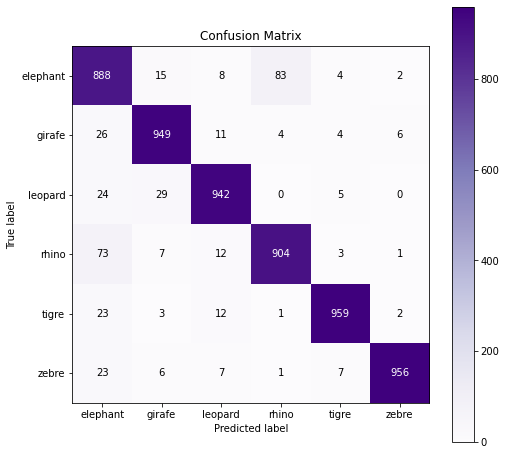

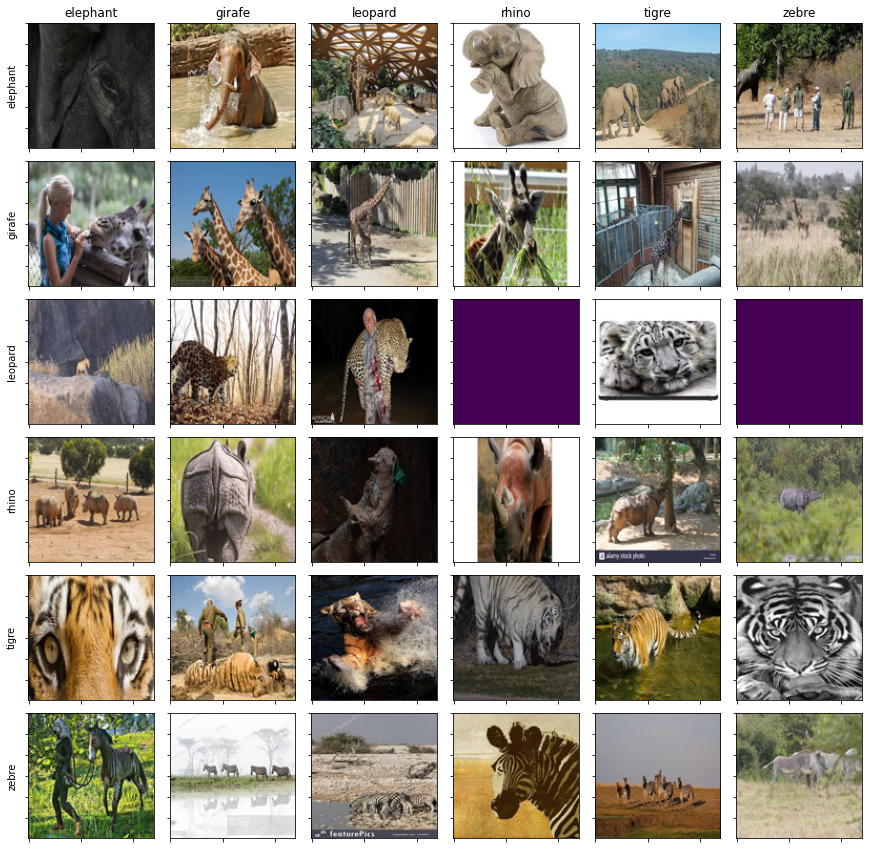

In [ ]:

# ===========================================================================
# TP2 : INF7370 - Hiver 2022
#
# Indiquer votre nom ici
# Mohamad Hawchar : HAWM20039905
#===========================================================================


#===========================================================================
# Dans ce script, on �value le mod�le entrain� dans 1_Modele.py
# On charge le mod�le en m�moire; on charge les images; et puis on applique le mod�le sur les images afin de pr�dire les classes



# ==========================================
# ======CHARGEMENT DES LIBRAIRIES===========
# ==========================================

# La libraire responsable du chargement des donn�es dans la m�moire
from keras.preprocessing.image import ImageDataGenerator

# Affichage des graphes
import matplotlib.pyplot as plt

# La librairie numpy 
import numpy as np

# Configuration du GPU
import tensorflow as tf
from keras import backend as K

# Utilis� pour le calcul des m�triques de validation
from sklearn.metrics import confusion_matrix, roc_curve , auc, multilabel_confusion_matrix

# Utlilis� pour charger le mod�le
from keras.models import load_model
from keras import Model


# ==========================================
# ===============GPU SETUP==================
# ==========================================

# Configuration des GPUs et CPUs
config = tf.compat.v1.ConfigProto(device_count={'GPU': 2, 'CPU': 4})
sess = tf.compat.v1.Session(config=config)
tf.compat.v1.keras.backend.set_session(sess)

# ==========================================
# ==================MOD�LE==================
# ==========================================

#Chargement du mod�le sauvegard� dans la section 1 via 1_Modele.py
model_path = "Model.hdf5"
Classifier : Model = load_model(model_path)

# ==========================================
# ================VARIABLES=================
# ==========================================

# ******************************************************
#                       QUESTIONS
# ******************************************************>
# 1) A ajuster les variables suivantes selon votre probl�me:
# - mainDataPath
# - number_images
# - number_images_class_0
# - number_images_class_1
# - image_scale
# - images_color_mode
# - images_color_mode
# ******************************************************


# L'emplacement des images de test
mainDataPath = "donnees/"
testPath = mainDataPath + "test"

# Le nombre des images de test � �valuer
number_images = 6000 # 1000 images pour la classe du chiffre 2 et 1000 pour la classe du chiffre 7
number_images_class_0 = 1000
number_images_class_1 = 1000
number_images_per_class = 1000

# La taille des images � classer
image_scale = 120

# La couleur des images � classer
images_color_mode = "rgb"  # grayscale or rgb

# ==========================================
# =========CHARGEMENT DES IMAGES============
# ==========================================

# Chargement des images de test
test_data_generator = ImageDataGenerator(rescale=1. / 255,
                                         )

test_itr = test_data_generator.flow_from_directory(
    testPath,# place des images
    target_size=(image_scale, image_scale), # taille des images
    class_mode="categorical",# Type de classification
    shuffle=False,# pas besoin de les boulverser
    batch_size=1,# on classe les images une � la fois
    color_mode=images_color_mode)# couleur des images

(x, y_true) = test_itr.next()

# getting the paths of the files
count = 0
list_of_generated_files = []
for filepath in test_itr.filepaths:
  count+=1
  list_of_generated_files.append(filepath)
  
print("count: " ,count , " shape of list: ", len(list_of_generated_files))




# Normalize Data
max_value = float(x.max())
x = x.astype('float32') / max_value

# ==========================================
# ===============�VALUATION=================
# ==========================================

# Les classes correctes des images (1000 pour chaque classe) -- the ground truth
y_true = np.array([0] * number_images_per_class + 
                  [1] * number_images_per_class + 
                  [2] * number_images_per_class + 
                  [3] * number_images_per_class + 
                  [4] * number_images_per_class + 
                  [5] * number_images_per_class )

# evaluation du mod�le
test_eval = Classifier.evaluate_generator(test_itr, verbose=1)

# Affichage des valeurs de perte et de precision
print('>Test loss (Erreur):', test_eval[0])
print('>Test pr�cision:', test_eval[1])

# Pr�diction des classes des images de test
predicted_classes = Classifier.predict_generator(test_itr, verbose=1)
#print("predicted class 0 shape:",predicted_classes.shape,"\n \t values: ",predicted_classes)
predicted_classes_perc = np.round(predicted_classes.copy(), 4)
#print("predicted class 1 shape:",predicted_classes.shape,"\n \t values: ",predicted_classes)
predicted_classes = np.round(predicted_classes) # on arrondie le output
#print("predicted class 2 shape:",predicted_classes.shape,"\n \t values: ",predicted_classes)
# 0 => classe 2
# 1 => classe 7

# Cette list contient les images bien class�es
correct = []
for i in range(0, len(predicted_classes) - 1):
    if np.where(predicted_classes[i] == 1)  == y_true[i]:
        correct.append(i)

# Nombre d'images bien class�es
print("> %d  �tiquettes bien class�es" % len(correct))

# Cette list contient les images mal class�es
incorrect = []
for i in range(0, len(predicted_classes) - 1):
    if np.where(predicted_classes[i] == 1) != y_true[i]:
        incorrect.append(i)

# Nombre d'images mal class�es
print("> %d �tiquettes mal class�es" % len(incorrect))

# ***********************************************
#                  QUESTIONS
# ***********************************************
#
# 2) Afficher la matrice de confusion
# 3) Afficher la courbe ROC
# 4) Extraire 5 images de chaque cat�gorie
#
# ***********************************************
# 1 Confusion Matrix
import scikitplot as skplt

y_pred = np.argmax(predicted_classes,axis=1)
labels=["elephant", "girafe", "leopard", "rhino","tigre","zebre"]
# switiching the indexs with the labels
y_pred = np.array([labels[i] for i in y_pred])
y_true = np.array([labels[i] for i in y_true])


skplt.metrics.plot_confusion_matrix(
    y_true, 
    y_pred, 
    #normalize=True,
    cmap = "Purples",
    figsize=(8,8)    
)
#2 5 images de chaque cat�gorie

import pandas as pd
from glob import glob
import os

path = '/content/donnees/test'
df = pd.DataFrame(columns=['FileName','Category'])
predictions_df = pd.DataFrame(y_pred,columns=['Prediction'])
prediction_paths_df = pd.DataFrame(list_of_generated_files,columns = ['Prediction-Path'])
predictions_paths = pd.DataFrame(y_pred,columns=['Prediction'])  
test_file_paths = []
for label in labels:
  test_file_paths = sorted(glob(os.path.join(path, label, "*.png")))
  for p in test_file_paths:
    df = df.append({'FileName':p, 'Category':label}, ignore_index=True)
  
print(len(test_file_paths)) 
predictions_df = pd.concat([predictions_df,prediction_paths_df],axis=1)
df = pd.concat([df,predictions_df],axis=1)
display(df)
#display(predictions_df)

from typing_extensions import final
from PIL import Image

rows,cols = 6,6
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))
plt.subplots_adjust(wspace=0.1, hspace=0.1)
j=0
i=0
k = 0
for i in range(0,6):
  for j in range(0,6):

    l1 = labels[i]
    l2 = labels[j]

    if i == 0:    
      axes[i//cols, j%cols].set_title(l2)
    if j == 0:
      axes[i, j].set_ylabel(l1)   
    try:
      path = df[(df['Category'] == l1) & (df['Prediction'] == l2)].head(1)
      path = path['FileName'].iloc[0]
      img = Image.open(path)
       
      axes[k//cols, k%cols].imshow(img.resize((120,120)))
      axes[k//cols, k%cols].set_xticklabels([])
      axes[k//cols, k%cols].set_yticklabels([])
      k+=1
    except :
      # print the case where there is no animal x calssified as animal y. in our case it prints (leopard /rhino, leopard /zebre)
      axes[k//cols, k%cols].imshow(np.zeros((120,120)))
      axes[k//cols, k%cols].set_xticklabels([])
      axes[k//cols, k%cols].set_yticklabels([])
      print(f"{l1} /{l2}")
      k+=1
  # print("---------------------")
    
